In [134]:
#Import necessary libraries
# Data Preprocessing Libraries 
import numpy as np
import pandas as pd
#Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
#Model Building and Prediction
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score
from sklearn.utils import resample
#Random Forest Libraries
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Load the file into a DataFrame
mydata=pd.read_csv(r"E:\Codsoft\Churn_Modelling\Churn_Modelling.csv")
mydata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
mydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [40]:
mydata.describe() 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Plotting all columns

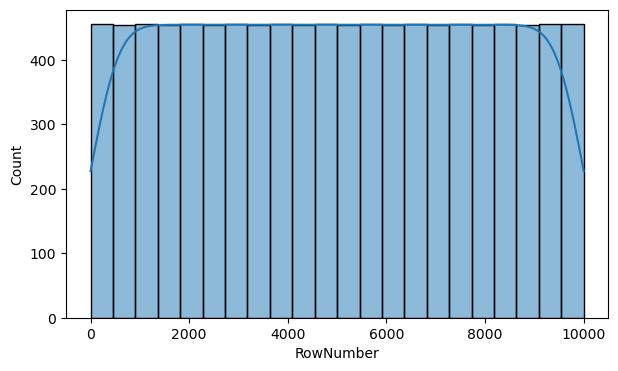

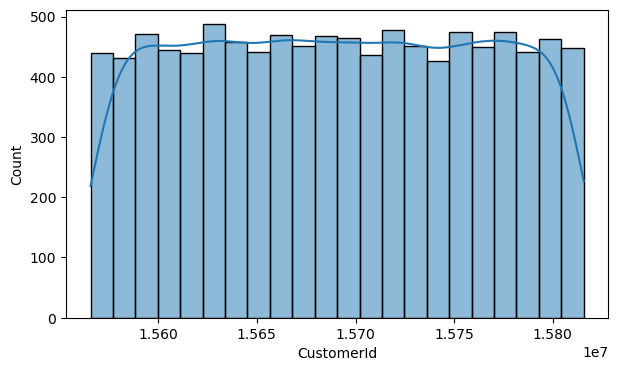

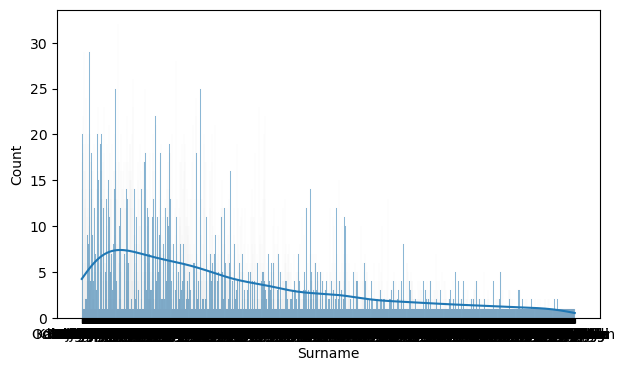

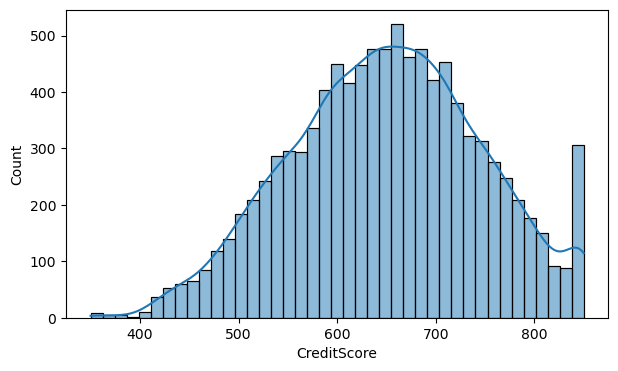

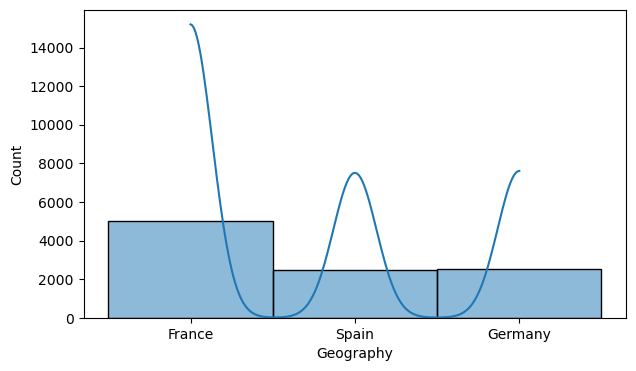

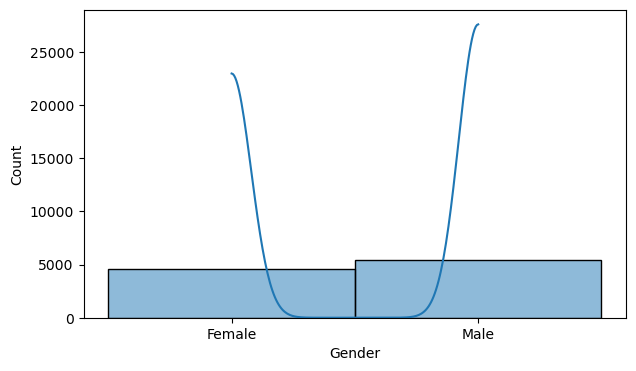

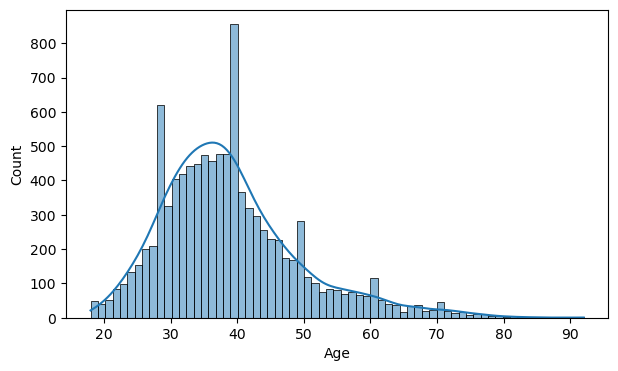

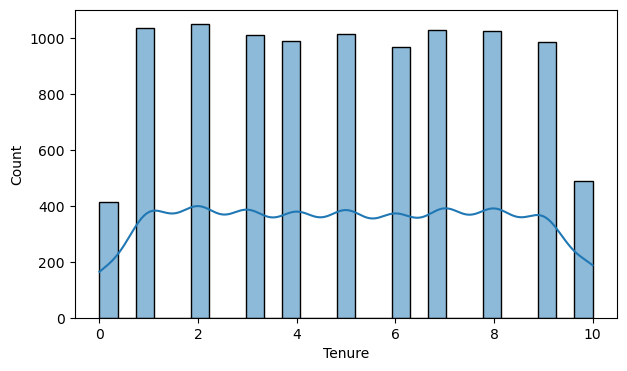

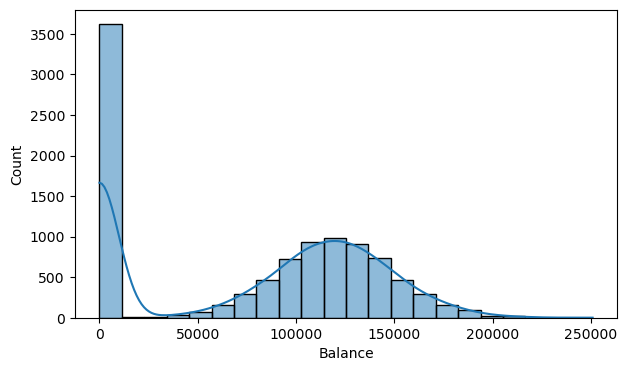

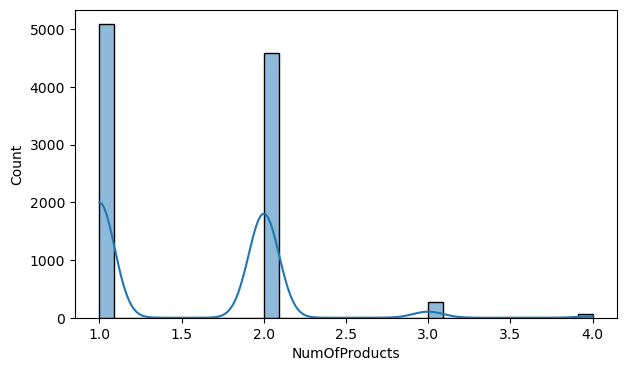

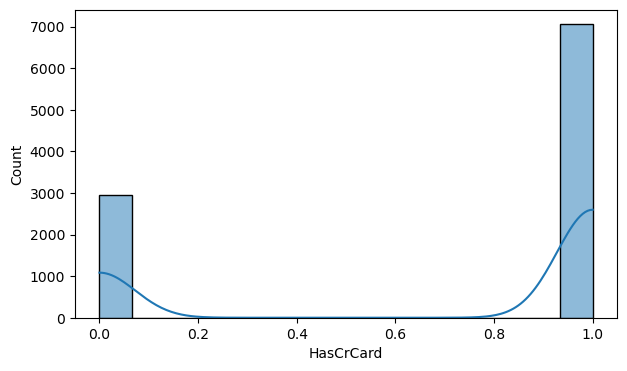

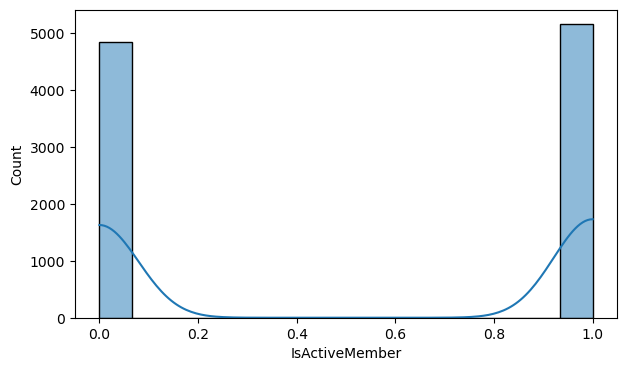

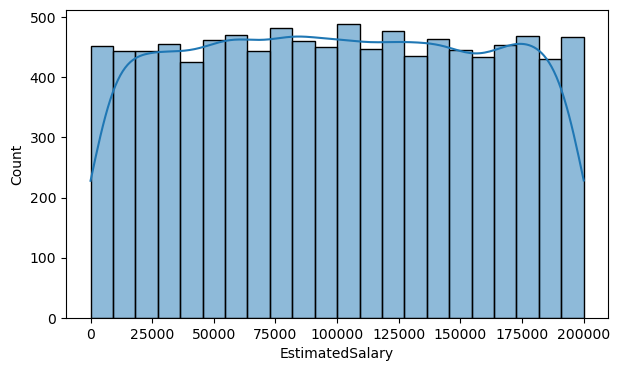

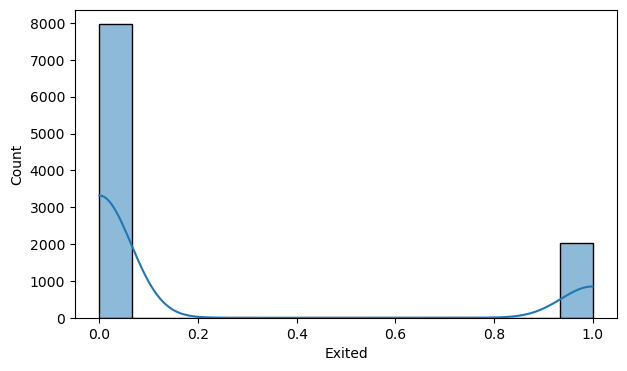

In [48]:
for i in mydata.columns:
    plt.figure (figsize=(7,4))
    sns.histplot(data=mydata,x=i,kde=True)
    plt.show()

### Balancing the Dataset

In [52]:
not_Exited = mydata[mydata["Exited"] == 0]
Exited = mydata[mydata["Exited"] == 1]

print(not_Exited.shape[0])
print(Exited.shape[0])

7963
2037


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

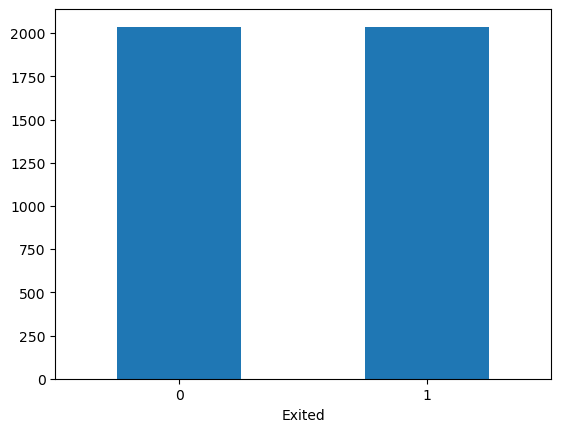

In [58]:
not_Exited = not_Exited.sample(Exited.shape[0], random_state=42)

mydata_new = pd.concat([not_Exited , Exited])
mydata_new["Exited"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

### Correlational Analysis 

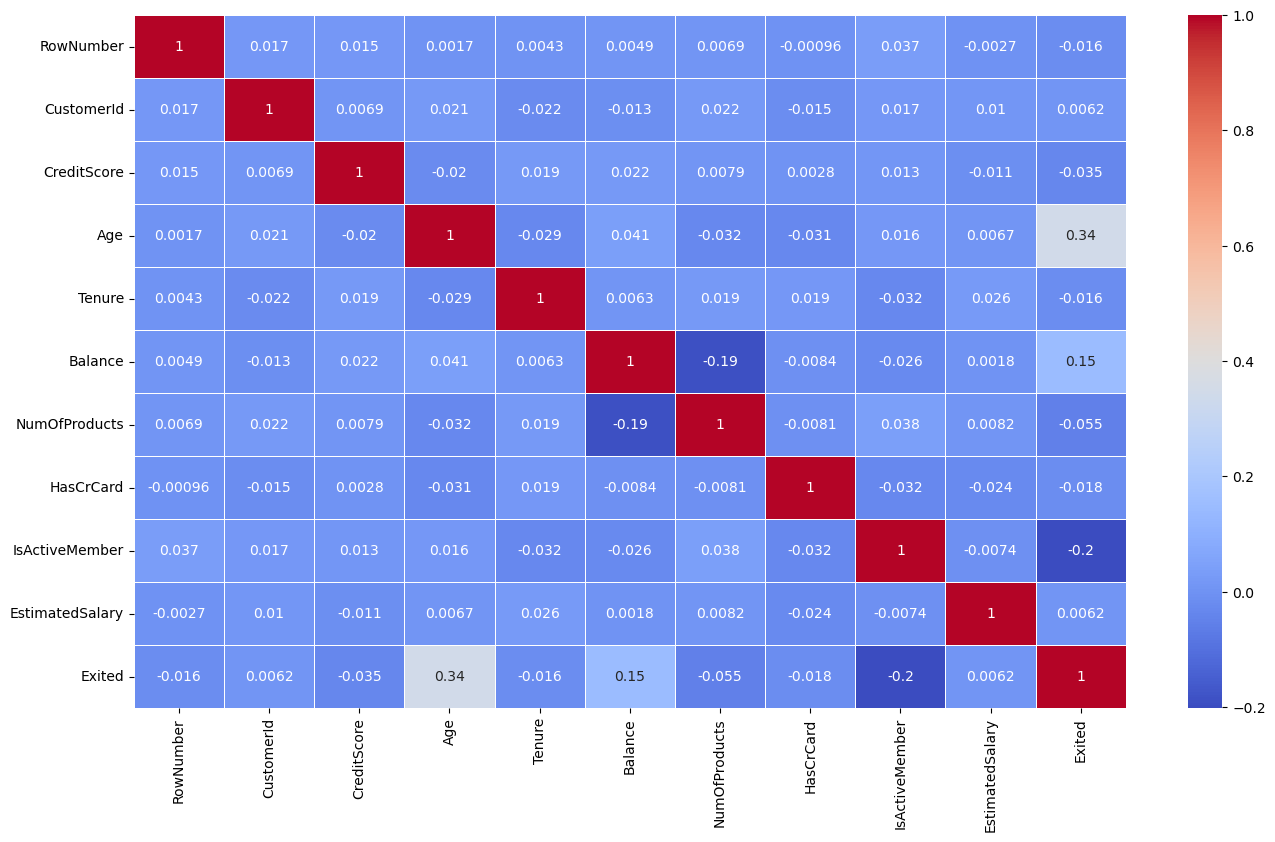

In [75]:
#Selecting only numeric columns
numeric_columns = mydata_new.select_dtypes(include=['number'])

# Calculating the correlation matrix
corr = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
## It is a negative correlation

##### As we can see there is a stong correlation between age and exited columns



### Model Building 

#### Data Preprocessing

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = mydata[["CreditScore", "Age", "Balance", "EstimatedSalary", "Gender", "IsActiveMember","HasCrCard","NumOfProducts","Geography"]]
X.loc[:, 'Gender'] = X["Gender"].map({'Male': 0, 'Female': 1})
X.loc[:, "Geography"] = le.fit_transform(X["Geography"])
Y = mydata[["Exited"]]

X.head(10),Y.head(10)

(   CreditScore  Age    Balance  EstimatedSalary Gender  IsActiveMember  \
 0          619   42       0.00        101348.88      1               1   
 1          608   41   83807.86        112542.58      1               1   
 2          502   42  159660.80        113931.57      1               0   
 3          699   39       0.00         93826.63      1               0   
 4          850   43  125510.82         79084.10      1               1   
 5          645   44  113755.78        149756.71      0               0   
 6          822   50       0.00         10062.80      0               1   
 7          376   29  115046.74        119346.88      1               0   
 8          501   44  142051.07         74940.50      0               1   
 9          684   27  134603.88         71725.73      0               1   
 
    HasCrCard  NumOfProducts Geography  
 0          1              1         0  
 1          0              1         2  
 2          1              3         0  
 3       

### Logistic Regression

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape Y_train and Y_test if necessary
Y_train = Y_train.values.ravel()

print(len(X_train), len(X_test), len(Y_train), len(Y_test))

8000 2000 8000 2000


In [128]:
model = LogisticRegression(penalty="l1", solver="liblinear")
model.fit(X_train, Y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [132]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Testing Accuracy Score:", accuracy)

Testing Accuracy Score: 0.8155


### Training a RandomForestClassifier and evaluating its accuracy

In [144]:
# Define the parameters for the Random Forest Classifier
random_f_params = {
    'max_depth': 16,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100,
    'random_state': 12345
}

# Initialize the Random Forest model with specified parameters
random_f_model = RandomForestClassifier(**random_f_params)

# Fit the Random Forest model on the training data
random_f_model.fit(X_train, Y_train)

# Predict using the trained Random Forest model on the test data
Y_pred_rf = random_f_model.predict(X_test)

# Evaluate the accuracy of the model using accuracy_score
from sklearn.metrics import accuracy_score
random_f_accuracy = accuracy_score(Y_test, Y_pred_rf)

# Print the accuracy of the Random Forest model
print("Training Accuracy:", random_f_accuracy)

Training Accuracy: 0.8695


### Conclusion
 * In conclusion we find out that Logistic Regression and Random Forest Algorithm gives an accuracy of 81.75%